In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime

stock_ticker = 'AMZN'
stock_info = yf.Ticker(stock_ticker)

price_df =yf.download(stock_ticker,
                     end=datetime.date.today(),
                     start='2010-01-01')
price_df["long_ma"] = price_df["Adj Close"].ewm(halflife=20, min_periods=50).mean()
price_df["short_ma"] = price_df["Adj Close"].ewm(halflife=3, min_periods=50).mean()
#price_df.tail(20)


[*********************100%***********************]  1 of 1 completed


Amazon.com, Inc.


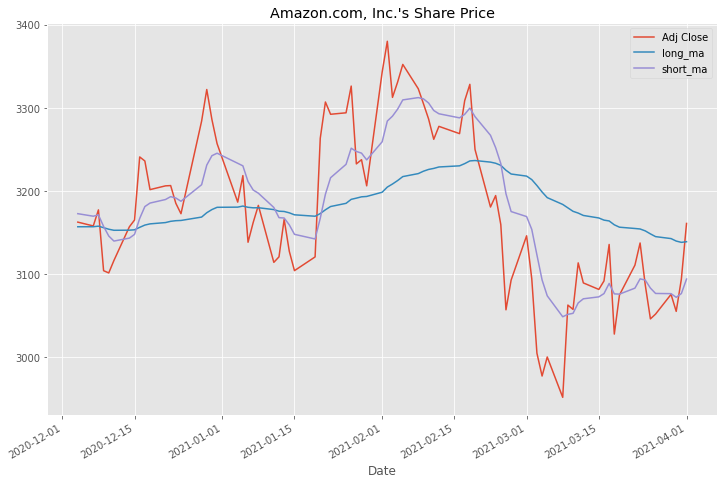

In [2]:
start_date = datetime.datetime.today() - datetime.timedelta(days=120)
end_date = datetime.date.today()

print(stock_info.info["shortName"])

plt.style.use('ggplot')
ax = price_df.loc[start_date:end_date]\
    .plot(y=["Adj Close", "long_ma", "short_ma"], figsize=(12,8),
          title=f"{stock_info.info['shortName']}'s Share Price")

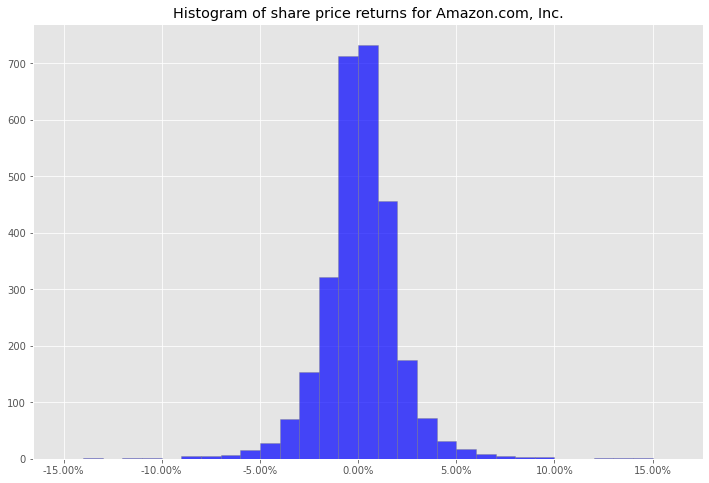

In [3]:
price_df['log_ret'] = np.log(price_df["Adj Close"]) - np.log(price_df["Adj Close"].shift(1))
fig, ax1 = plt.subplots(figsize=(18, 9))
min_ret  = round(price_df.log_ret.min(skipna=True), 2)-0.01
max_ret = round(price_df.log_ret.max(skipna=True), 2)+0.01
hist_bins = np.arange(min_ret, max_ret, 0.01)
plt.hist(price_df.log_ret, bins=hist_bins, edgecolor='grey',
         color='b', alpha=0.7)
fig.set_size_inches(12, 8)
ax1.set_title(f"Histogram of share price returns for {stock_info.info['shortName']}")
ax1.xaxis.set_major_formatter('{x:.2%}')

In [17]:
from fuzzywuzzy import fuzz, process
import requests

r = requests.get('https://api.iextrading.com/1.0/ref-data/symbols')
stock_list = r.json()


print(fuzz.ratio("This is a test", "That was a test!"))

similar_companies = process.extract('Google',stock_list)

73
